1.Save the Saturday, June 17th, 2017 data to a csv file. You can find it here: http://web.mta.info/developers/turnstile.html and read it in using read_csv. View the head of the dataframe.

In [156]:
#insert 1
import pandas as pd

df = pd.read_csv('turnstile_170617.csv')
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,00:00:00,REGULAR,6215258,2104297
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,04:00:00,REGULAR,6215284,2104303
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,08:00:00,REGULAR,6215318,2104337
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,12:00:00,REGULAR,6215475,2104417
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/10/2017,16:00:00,REGULAR,6215841,2104465


2.View the dataframe columns. Is there extra whitespace at the end of any of the column names? Strip all of the whitespace.

In [157]:
#insert 2
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [158]:
df.columns = df.columns.str.strip()
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

3.In one line, determine how many rows are in your dataframe and if there are are any null entries.

In [8]:
#insert 3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197209 entries, 0 to 197208
Data columns (total 11 columns):
C/A         197209 non-null object
UNIT        197209 non-null object
SCP         197209 non-null object
STATION     197209 non-null object
LINENAME    197209 non-null object
DIVISION    197209 non-null object
DATE        197209 non-null object
TIME        197209 non-null object
DESC        197209 non-null object
ENTRIES     197209 non-null int64
EXITS       197209 non-null int64
dtypes: int64(2), object(9)
memory usage: 16.6+ MB


4.In one line, print out the unique STATION names. How many are there? (Hint: use set).

In [12]:
#insert 4
print(set(df['STATION']),len(set(df['STATION'])))

{'111 ST', 'RALPH AV', '103 ST', 'ST LAWRENCE AV', 'NECK RD', 'CANARSIE-ROCKAW', '4 AV-9 ST', 'SOUTH FERRY', '215 ST', 'BEVERLY RD', '72 ST', '3 AV-149 ST', '30 AV', '5 AV/53 ST', '15 ST-PROSPECT', 'CORTELYOU RD', 'ORCHARD BEACH', 'AVENUE U', 'NEWARK C', 'NEW UTRECHT AV', '82 ST-JACKSON H', 'MT EDEN AV', 'CENTRAL AV', 'KINGSBRIDGE RD', 'JUNCTION BLVD', '8 ST-NYU', 'NEW LOTS', 'JAY ST-METROTEC', 'EAST 105 ST', '90 ST-ELMHURST', 'NEPTUNE AV', 'BEACH 25 ST', 'PENNSYLVANIA AV', '21 ST-QNSBRIDGE', '61 ST WOODSIDE', 'FAR ROCKAWAY', 'BROADWAY JCT', 'BAYCHESTER AV', 'JOURNAL SQUARE', 'DITMAS AV', 'KNICKERBOCKER', '42 ST-BRYANT PK', 'GATES AV', 'WHITLOCK AV', 'BROAD CHANNEL', 'ROCKAWAY BLVD', 'AVENUE P', '75 ST-ELDERTS', 'FRANKLIN ST', '80 ST', 'NEVINS ST', 'NEWARK HM HE', '33 ST', '46 ST', 'NOSTRAND AV', '125 ST', 'GROVE STREET', 'VERNON-JACKSON', 'LORIMER ST', 'DYCKMAN ST', 'ATL AV-BARCLAY', 'ROOSEVELT ISLND', 'CHRISTOPHER ST', "E 143/ST MARY'S", '45 ST', 'DEKALB AV', '14 ST', 'BEACH 98 ST', 

5.Okay, so we understand what station represents. But what the heck are C/A, UNIT, and SCP? Keep in mind that in the larger stations, you might have multiple areas within one station that look like this:

<img src="image.jpg" style="width: 300px;"/>

Further complicating things, there are a few station names like 14TH ST that refer to more than one station location along that street.

This data set is not very well documented. Welcome to the joys of real world data science!!!

Read the following two links carefully to see other people's confusion and what information they have been able to gather:

https://groups.google.com/forum/#!topic/mtadeveloperresources/AMVx2WUY9iI

https://groups.google.com/forum/#!searchin/mtadeveloperresources/%22remote$20unit%22%7Csort:relevance/mtadeveloperresources/z8l3ZU9cY6Y/OFlHGkFAimQJ

What did Patrick O'Hara and Katie Toth have to say?

In [5]:
#insert 5
#C/A: control area is kind of like a 'station' for a specific line
#UNIT: a remote unit is kind of like a 'booth' so the same station can have a couple booths
#SCP: the subunit channel position could represent a turnstile, but could also represent a collection of turnstiles

6.To simplify our calculations right now, let's only look at ridership on Monday, June 12th, 2017. In one line, create a dataset called monday that just includes the dates listed as 06/12/2017.

Then, use the command "monday = monday.reset_index(drop=True)" to reset the index.

In [93]:
#insert 6
monday = df[df.DATE == '06/12/2017']
monday = monday.reset_index(drop=True)
monday.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2017,00:00:00,REGULAR,6217322,2104727
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2017,04:00:00,REGULAR,6217332,2104729
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2017,08:00:00,REGULAR,6217372,2104813
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2017,12:00:00,REGULAR,6217540,2105024
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2017,16:00:00,REGULAR,6217825,2105081


7.Create a dictionary called monday_dict mapping the tuple (C/A, UNIT,SCP, STATION) to a list of tuples containing (TIME,EXITS).

For example, the key ('A002', 'R051', '02-00-00','59 ST') in your dictionary should give the value:

[('00:00:00', 2104727),
 ('04:00:00', 2104729),
 ('08:00:00', 2104813),
 ('12:00:00', 2105024),
 ('16:00:00', 2105081),
 ('20:00:00', 2105134)]

In [26]:
#insert 7
monday_dict = {}
for i in range(len(monday.index)):
    mytuple = (monday['C/A'][i], monday.UNIT[i],monday.SCP[i],monday.STATION[i])
    if mytuple not in monday_dict.keys():
        monday_dict[mytuple]=[(monday.TIME[i],monday.EXITS[i])]
    else:
        monday_dict[mytuple].append((monday.TIME[i],monday.EXITS[i]))
print(monday_dict[('A002', 'R051', '02-00-00','59 ST')])

[('00:00:00', 2104727), ('04:00:00', 2104729), ('08:00:00', 2104813), ('12:00:00', 2105024), ('16:00:00', 2105081), ('20:00:00', 2105134)]


8.Note: as you get more comfortable with pandas, you will rely more on built-in pandas capabilities and less on creating dictionaries from scratch. For example, run the following lines of code to verify that this dataframe gives you the same info that you got in Exercise 7.

In [25]:
x=monday.groupby(['C/A', 'UNIT', 'SCP', 'STATION']).groups #the keys are the station pairs and the values are the row indices
flds = ['TIME','EXITS'] #we want to make values out of the remaining columns
monday_exits = {key: monday.loc[val,flds] for key, val in x.items()}
monday_exits[('A002', 'R051', '02-00-00','59 ST')]

,TIME,EXITS
0,00:00:00,2104727
1,04:00:00,2104729
2,08:00:00,2104813
3,12:00:00,2105024
4,16:00:00,2105081
5,20:00:00,2105134


9.What the heck do these exit numbers represent? We can assume that they represent some sort of counter on the turnstile. We can subtract the exits at t=20 minus t=0 to figure out how many riders exited this turnstile between midnight and 8 pm.

Can we calculate 20 - 0 for all of the stations? No! Unfortunately, the time increments aren't standardized. Many of the times are listed in 4 hour intervals of midnight, 4 am, 8 am, etc but not all. Make a frequency chart of the times for the monday dataframe from Exercise 6.



In [28]:
#insert 9
monday.TIME.value_counts()

00:00:00    2409
20:00:00    2408
12:00:00    2408
08:00:00    2407
16:00:00    2405
04:00:00    2405
17:00:00    1741
13:00:00    1740
05:00:00    1740
01:00:00    1740
09:00:00    1739
21:00:00    1738
14:00:00     110
02:00:00     110
22:00:00     110
06:00:00     110
10:00:00     110
18:00:00     110
15:00:00      39
11:00:00      39
23:00:00      39
19:00:00      39
07:00:00      39
03:00:00      39
08:22:00      37
16:22:00      37
20:22:00      37
00:22:00      37
04:22:00      37
12:22:00      37
            ... 
05:39:24       1
15:11:37       1
01:20:07       1
00:49:43       1
10:29:13       1
03:01:39       1
07:29:52       1
08:05:28       1
03:02:58       1
08:25:20       1
01:24:41       1
13:53:24       1
23:00:44       1
21:36:14       1
01:04:40       1
13:44:30       1
00:25:37       1
23:06:49       1
22:59:51       1
15:28:11       1
19:15:44       1
13:28:24       1
03:04:48       1
05:23:19       1
03:26:59       1
01:28:06       1
09:05:29       1
21:25:37      

10.Use your monday_dict from Exercise 7 to create a dictionary called monday_dict_diff that maps (C/A, UNIT, SCP, STATION) to the differences in exits between two consective times in order to see how many people exited through a turnstile within a given time interval.

For example, the key ('A002', 'R051', '02-00-00','59 ST') should map to:

[('04:00:00', 2),
 ('08:00:00', 84),
 ('12:00:00', 211),
 ('16:00:00', 57),
 ('20:00:00', 53)]

In [38]:
#insert 10
monday_dict_diff = {}
for a,b in monday_dict.items():
    for i in range(len(b)-1):
        diff = b[i+1][1]-b[i][1]
        if a not in monday_dict_diff.keys():
            monday_dict_diff[a]=[(b[i+1][0],diff)]
        else:
            monday_dict_diff[a].append((b[i+1][0],diff))
print(monday_dict_diff[('A002', 'R051', '02-00-00','59 ST')])

[('04:00:00', 2), ('08:00:00', 84), ('12:00:00', 211), ('16:00:00', 57), ('20:00:00', 53)]


11.Once again, note that pandas can do the above calculation for you. If you used the monday_exits dataframe from Exercise 8, run the following code to verify that you obtain what you just got in Exercise 10. It may take a bit longer to run.

In [29]:
monday_diff = {}

for turnstile, slice_df in monday_exits.items():
    diff = slice_df['EXITS'].diff().values #calculates the exit difference between each entry
    monday_diff[turnstile] = pd.Series(diff, index=slice_df['TIME'].values) #maps turnstile to (time, exit difference) pairs
    for i,(key, val) in enumerate(monday_diff[turnstile].items()):
        try: #need a try because you'll get an error for NAN difference values since there is one less difference than the number of times
            monday_exits[turnstile].at[i,'EXITS'] = val
        except:
            continue
    monday_exits[turnstile] = monday_exits[turnstile].drop(0)    #drop the first time because you only calculate differences after the second time.                   
    
monday_exits[('A002', 'R051', '02-00-00', '59 ST')]

,TIME,EXITS
1,04:00:00,2
2,08:00:00,84
3,12:00:00,211
4,16:00:00,57
5,20:00:00,53


12.Find how many people in total passed through a given turnstile between the hours given for 06/12/2017. For example, if a turnstile is on increments of 0,4,8,...,20, then you want to find out how many total people passed through between midnight and 8 pm. Create a dictionary called total_turnstile that maps (C/A,UNIT,SCP,STATION) to total Monday ridership. Use your dictionary from Exercise 10.

Hint: the key ('A002', 'R051', '02-00-00', '59 ST') should map to 407 total riders.

In [39]:
#insert 12
total_turnstile = {}
for a,b in monday_dict_diff.items():
    total = 0
    for i in range(len(b)):
        total += b[i][1]
    total_turnstile[a]=total
print(total_turnstile[('A002', 'R051', '02-00-00','59 ST')])

407


13.Use your work in Exercise 12 to create a dictionary called total_riders that maps the (C/A, UNIT, STATION) location to all riders that passed through ALL of the turnstiles in that area on Monday.

Hint 1: use the get command

Hint 2: ('A002', 'R051', '59 ST') should have 6704 total riders.

In [66]:
#insert 13
total_riders = {}
for a,b in total_turnstile.items():
    x = (a[0],a[1],a[3])
    if x not in total_riders.keys():
        total_riders[x]=b
    else:
        total_riders[x]+=b
print(total_riders[('A002', 'R051', '59 ST')])

6704


14.Create a list of tuples called tuple_list using your total_riders dictionary so that you can sort the list in decending order to see busiest stations. Hint: the busiest area should be the PATH World Trade Center station.

In [83]:
#insert 14
tuple_list = []
for a,b in total_riders.items():
    tuple_list.append((a,b))
tuple_list = sorted(tuple_list, key=lambda x:(-x[1],x[0]))
print(tuple_list[0][0][2])

PATH NEW WTC


15.Look at the three smallest riderships in your above tuple list. Do they make sense? What about your data caused negative numbers? Welcome to the world of buggy real world data! Remove these three items from your tuple list.

In [84]:
#insert 15
tuple_list.remove((('PTH03', 'R552', 'JOURNAL SQUARE'), -45421))
tuple_list.remove((('R241A', 'R048', 'GRD CNTRL-42 ST'), -2060))
tuple_list.remove((('N029', 'R333', '116 ST'), -333))
print(tuple_list)

[(('PTH22', 'R540', 'PATH NEW WTC'), 56297), (('R238', 'R046', 'GRD CNTRL-42 ST'), 50291), (('R240', 'R047', 'GRD CNTRL-42 ST'), 39654), (('R249', 'R179', '86 ST'), 31126), (('N500', 'R020', '47-50 STS ROCK'), 27180), (('R138', 'R293', '34 ST-PENN STA'), 26181), (('A025', 'R023', '34 ST-HERALD SQ'), 25527), (('R533', 'R055', 'FLUSHING-MAIN'), 24776), (('R221', 'R170', '14 ST-UNION SQ'), 24129), (('N507', 'R023', '34 ST-HERALD SQ'), 24085), (('N506', 'R022', '34 ST-HERALD SQ'), 24053), (('N049', 'R084', '59 ST COLUMBUS'), 24049), (('H009', 'R235', 'BEDFORD AV'), 23536), (('A034', 'R170', '14 ST-UNION SQ'), 23504), (('N306', 'R017', 'LEXINGTON AV/53'), 23196), (('N083', 'R138', 'W 4 ST-WASH SQ'), 23123), (('N324', 'R018', 'JKSN HT-ROOSVLT'), 22670), (('N063A', 'R011', '42 ST-PORT AUTH'), 22189), (('N501', 'R020', '47-50 STS ROCK'), 22075), (('R258', 'R132', '125 ST'), 21168), (('R169', 'R168', '96 ST'), 20911), (('A033', 'R170', '14 ST-UNION SQ'), 20589), (('R151', 'R033', 'TIMES SQ-42 S

16.Create a barchart for the number of riders. You don't need to keep track of the names of each station, as that would get really messy to plot. Instead, you can just use a list comprehension to save the rider numbers to the y-values and give the stations the numbers 0,1,2,3,... for the x-values. You can use the following piece of code. Remember to add in axis labels and a title.

x = range(len(tuple_list))

y = [tuple_list[i][0] for i in range(len(tuple_list))]

plt.bar(x,y)

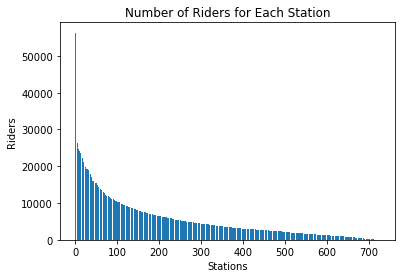

In [90]:
#insert 16
import matplotlib.pyplot as plt
x = range(len(tuple_list))
y = [tuple_list[i][1] for i in range(len(tuple_list))]
plt.bar(x,y)
plt.xlabel('Stations')
plt.ylabel('Riders')
plt.title('Number of Riders for Each Station')
plt.show()

17.Perhaps we don't care about total ridership in a 24 period. Perhaps we only care about the morning commute. Let's assume that the majority of people arrive at their work location subway exit between 8 and 9 am.  

Go back up to your frequency chart in Exercise 9. Note that the most common morning commutes would be gained from subtracting 9 am - 5 am and 10 am - 6 am and 11 am - 7 am and 12pm - 8am, for the stations that are broken down by those specific four hour intervals.

As a dirty way to consider only the stations that are on these time intervals, save just the rows in your original monday dataframe that contain the TIME strings '05:00:00', '06:00:00',..., '12:00:00'. Remember you can do this by using OR statements using the "|" symbol and remembering parenthesis. Call this new dataframe "morning". Be sure to reset its index.

In [115]:
#insert 17
morning = monday[(monday.TIME == '05:00:00') | (monday.TIME == '06:00:00') | (monday.TIME == '07:00:00')|(monday.TIME == '08:00:00') | (monday.TIME == '09:00:00') | (monday.TIME == '10:00:00')| (monday.TIME == '11:00:00') | (monday.TIME == '12:00:00') ]
morning = morning.reset_index(drop=True)
morning.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2017,08:00:00,REGULAR,6217372,2104813
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/12/2017,12:00:00,REGULAR,6217540,2105024
2,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/12/2017,08:00:00,REGULAR,5615730,1247491
3,A002,R051,02-00-01,59 ST,NQR456W,BMT,06/12/2017,12:00:00,REGULAR,5615864,1247619
4,A002,R051,02-03-00,59 ST,NQR456W,BMT,06/12/2017,08:00:00,REGULAR,926883,3436892


18.Now create a morning_dict by repeating your work in Exercise 7 on this morning dataframe. The dictionary should map the tuple (C/A, UNIT, SCP,STATION) to an inner dictionary containing {TIME: EXITS} for all Monday rides.

Hint: ('A002', 'R051', '02-00-00','59 ST') should map to {'08:00:00': 2104813, '12:00:00': 2105024}.

In [116]:
#insert 18
morning_dict = {}
for i in range(len(morning.index)):
    mytuple = (morning['C/A'][i], morning.UNIT[i],morning.SCP[i],morning.STATION[i])
    if mytuple not in morning_dict.keys():
        morning_dict[mytuple]=[(morning.TIME[i],morning.EXITS[i])]
    else:
        morning_dict[mytuple].append((morning.TIME[i],morning.EXITS[i]))
print(morning_dict[('A002', 'R051', '02-00-00','59 ST')])

[('08:00:00', 2104813), ('12:00:00', 2105024)]


19.We're almost ready to subtract the two consecutive times for each station to get the morning commutes. That is, if there are exactly two times for each station. Find which stations keys in your dictionary above do not contain exactly two times and delete them from the morning dictionary.

How many keys are left in your morning_dict? There should be 4293.

In [127]:
#insert 19
x = []
for a,b in morning_dict.items():
    if len(b) != 2:
        x.append(a)
for i in x:
    morning_dict.pop(i)
print(len(morning_dict))

4293


20.Create a dictionary called morning_differences where (C/A, UNIT, STATION) maps to an inner dictionary containing {SCP: Morning Exit Differences}.

For example, ('A002', 'R051', '59 ST') should map to:

{'02-00-00': 211,
 '02-00-01': 128,
 '02-03-00': 654,
 '02-03-01': 630,
 '02-03-02': 533,
 '02-03-03': 401,
 '02-03-04': 186,
 '02-03-05': 49,
 '02-03-06': 8,
 '02-05-00': 0,
 '02-05-01': 0,
 '02-06-00': 4}

In [124]:
#insert 20
morning_differences = {}
for a,b in morning_dict.items():
    for i in range(1):
        key = (a[0],a[1],a[3])
        diff = b[i+1][1]-b[i][1]
        if key not in morning_differences.keys():
            morning_differences[key]=[(a[2],diff)]
        else:
            morning_differences[key].append((a[2],diff))
print(morning_differences[('A002', 'R051', '59 ST')])

[('02-00-00', 211), ('02-00-01', 128), ('02-03-00', 654), ('02-03-01', 630), ('02-03-02', 533), ('02-03-03', 401), ('02-03-04', 186), ('02-03-05', 49), ('02-03-06', 8), ('02-05-00', 0), ('02-05-01', 0), ('02-06-00', 4)]


21.Create a dictionary called total_morning_diff that maps each (C/A, Unit, Station) location to the total morning riders passing through ALL of the turnstiles in that area.

Hint 1: see your work in Exercise 13.

Hint 2: ('A002', 'R051','59 ST') should have 2804 morning commuter exits.


In [126]:
#insert 21
total_morning_diff = {}
for a,b in morning_differences.items():
    x = 0
    for i in range(len(b)):
        x += b[i][1]
    total_morning_diff[a]=x
print(total_morning_diff[('A002', 'R051', '59 ST')])

2804


22.Create a list of sorted tuples to see the most popular morning exits.

Hint:  ('R238', 'R046', 'GRD CNTRL-42 ST') should be the highest with 17,300 morning exits.

In [134]:
#insert 22
popular = []
for a,b in total_morning_diff.items():
    popular.append((a,b))
popular = sorted(popular, key=lambda x:(-x[1],x[0]))
print(popular[0])

(('R238', 'R046', 'GRD CNTRL-42 ST'), 17300)


23.We notice that the ('R204', 'R043', 'WALL ST') stop is pretty high on the Monday morning list. How can we tell if this exit is more of a commuter or tourist exit? Maybe we'll see if the total number of people is higher on a weekday than a weekend. Go back to the original df dataframe. Save only the items that contain ('R204', 'R043', 'WALL ST') to a dataframe called wallstreet and create a list of tuples where the first entry is the date and the second entry is the total ridership. 

Hint: there should be 9936 riders on 06/15/2017.

In [204]:
#insert 23
wallstreet = df[(df['C/A'] == 'R204') & (df.UNIT == 'R043') & (df.STATION == 'WALL ST')]
wallstreet = wallstreet.reset_index(drop=True)

dic = {}
for i in range(len(wallstreet.index)):
    key = (wallstreet.DATE[i],wallstreet.SCP[i])
    if key not in dic.keys():
        dic[key]=[(wallstreet.TIME[i],wallstreet.EXITS[i])]
    else:
        dic[key].append((wallstreet.TIME[i],wallstreet.EXITS[i]))

diffs = {}
for a,b in dic.items():
    for i in range(len(b)-1):
        diff = b[i+1][1]-b[i][1]
        if a not in diffs.keys():
            diffs[a]=diff
        else:
            diffs[a]+=diff

riders = {}
for a,b in diffs.items():
    if a[0] not in riders:
        riders[a[0]] = b
    else:
        riders[a[0]] += b

n = []
for a,b in riders.items():
    n.append((a,b))
for i in n:
    if i[0] == '06/15/2017':
        print(i[1])

9936


24.Plot the list of tuples you made where date is the x-axis and ridership is the y-axis for this wall street station.

Hint: you'll first need to use datetime to convert the dates to datetime format.

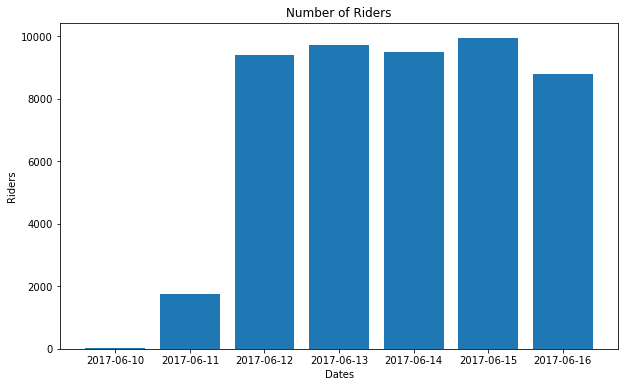

In [235]:
#insert 24
import matplotlib.pyplot as plt
from datetime import datetime
date = []
riders = []
for i in n:
    date.append(datetime.strptime(i[0],'%m/%d/%Y'))
    riders.append(i[1])
plt.figure(figsize=(10,6))
plt.bar(date,riders)
plt.xlabel('Dates')
plt.ylabel('Riders')
plt.title('Number of Riders')
plt.show()

25.Now use datetime to convert the dates to "Mon", "Tues", etc and print the days of the week with corresponding ridership. Is this a commuter stop or a tourist stop?

In [233]:
#insert 25
import numpy as np
days = []
for i in date:
    days.append(i.strftime('%a'))
x = list(zip(days,riders))

weekday = []
weekend = []
for i in x:
    if i[0] == 'Sat' or 'Sun':
        weekend.append(i[1])
    else:
        weekday.append(i[1])
if np.mean(weekend) > np.mean(weekday):
    print('This is a tourist stop because the ridership is lower on weekdays than on weekends.')
else:
    print('This is a commuter stop because the ridership is higher on weekdays than on weekends.')

This is a commuter stop because the ridership is higher on weekdays than on weekends.


/Users/AnnieCheng/anaconda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/AnnieCheng/anaconda/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
